# Lab: Unsupervised Learning
In this lab we demonstrate PCA and clustering on several datasets.
As in other labs, we import some of our libraries at this top
level. This makes the code more readable, as scanning the first few
lines of the notebook tell us what libraries are used in this
notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data


We also collect the new imports
needed for this lab.

In [2]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage



In this lab, we perform clustering on  `USArrests`, a data set in the
`R` computing environment.
We retrieve the data using `get_rdataset()`, which can fetch data from
many standard `R` packages.

The rows of the data set contain the 50 states, in alphabetical order.

In [3]:
USArrests = get_rdataset('USArrests').data
USArrests


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


The columns of the data set contain the four variables.

In [4]:
USArrests.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

We first briefly examine the data. We notice that the variables have vastly different means.

In [5]:
USArrests.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Dataframes have several useful methods for computing
column-wise summaries. We can also examine the
variance of the four variables using the `var()`  method.

In [6]:
USArrests.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances.
The `UrbanPop` variable measures the percentage of the population
in each state living in an urban area, which is not a comparable
number to the number of rapes in each state per 100,000 individuals.
PCA looks for derived variables that account for most of the variance in the data set.
If we do not scale the variables before performing PCA, then the principal components
would mostly be driven by the
`Assault` variable, since it has by far the largest
variance.  So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA.
Typically we set the means to zero as well.

This scaling can be done via the `StandardScaler()` transform imported above. We first `fit` the
scaler, which computes the necessary means and standard
deviations and then apply it to our data using the
`transform` method. As before, we combine these steps using the `fit_transform()` method.


## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [7]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;


We now perform $K$-means clustering with $K=2$.

In [8]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)


We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [9]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

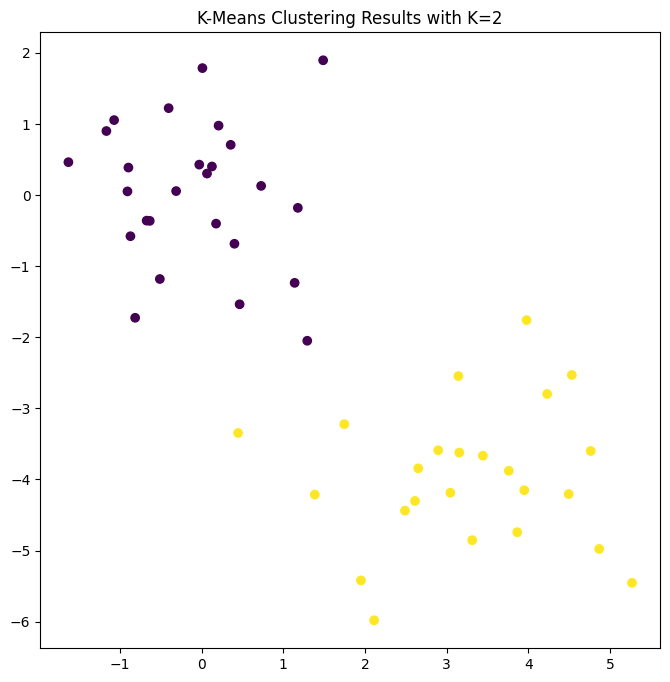

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");


Here the observations can be easily plotted because they are
two-dimensional. If there were more than two variables then we could
instead perform PCA and plot the first two principal component score
vectors to represent the clusters.

In this example,   we knew that there really
were two clusters because we generated the data. However, for real
data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could
instead have performed $K$-means clustering on this example with
$K=3$.

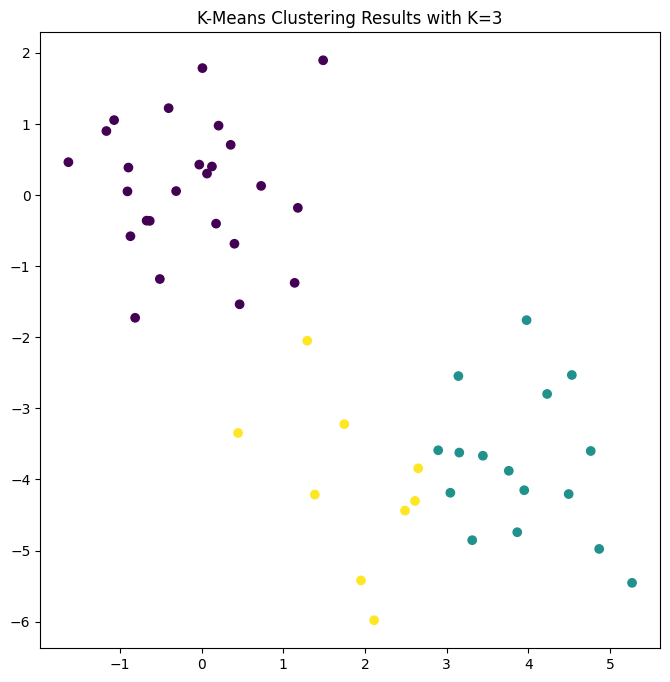

In [11]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");


When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10). If a
value of `n_init` greater than one is used, then $K$-means
clustering will be performed using multiple random assignments in
Step 1 of  Algorithm 12.2, and the `KMeans()` 
function will report only the best results. Here we compare using
`n_init=1` to `n_init=20`.

In [16]:
kmeans1 = KMeans(n_clusters=3,
                #random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_


(81.34148731729954, 75.0350825910044)

Note that `kmeans.inertia_` is the total within-cluster sum
of squares, which we seek to minimize by performing $K$-means
clustering (12.17). 

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple
initial cluster assignments, it is also important to set a random seed
using the `random_state` argument to `KMeans()`. This way, the initial
cluster assignments in Step 1 can be replicated, and the $K$-means
output will be fully reproducible.

### Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.
As its
name is long, we use the short hand `HClust` for *hierarchical clustering*. Note that this will not change the return type
when using this method, so instances will still be of class `AgglomerativeClustering`.
In the following example we use the data from the previous lab to plot the hierarchical clustering
dendrogram using complete, single, and average linkage clustering
with Euclidean distance as the dissimilarity measure.  We begin by
clustering observations using complete linkage.

In [17]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

This computes the entire dendrogram.
We could just as easily perform hierarchical clustering with average or single linkage instead:

In [18]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);


To use a precomputed distance matrix, we provide an additional
argument `metric="precomputed"`. In the code below, the first four lines computes the $50\times 50$ pairwise-distance matrix.

In [19]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)


AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

We use
`dendrogram()` from `scipy.cluster.hierarchy` to plot the dendrogram. However,
`dendrogram()` expects a so-called *linkage-matrix representation*
of the clustering, which is not provided by `AgglomerativeClustering()`,
but can be computed. The function `compute_linkage()` in the
`ISLP.cluster` package is provided for this purpose.

We can now plot the dendrograms. The numbers at the bottom of the plot
identify each observation. The `dendrogram()` function has a default method to
color different branches of the tree that suggests a pre-defined cut of the tree at a particular depth.
We prefer to overwrite this default by setting this threshold to be infinite. Since we want this behavior for many dendrograms, we store these values in a dictionary `cargs` and pass this as keyword arguments using the notation `**cargs`.

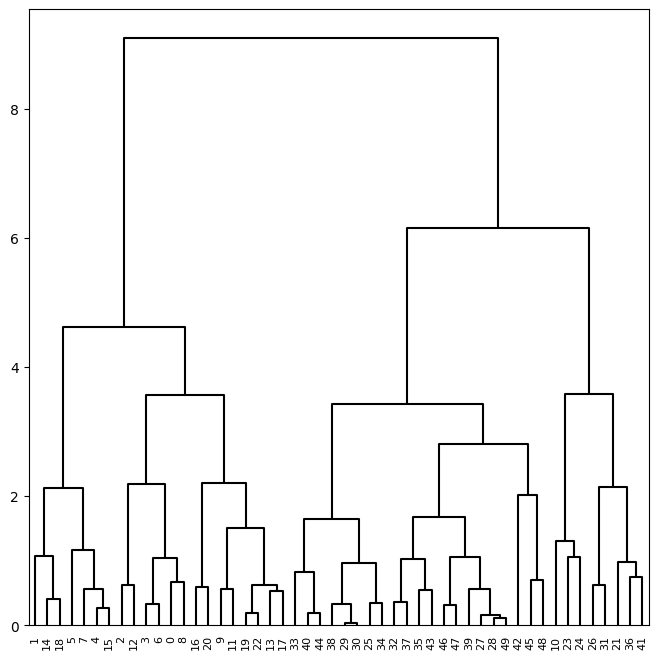

In [20]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);


We may want to color branches of the tree above
and below a cut-threshold differently. This can be achieved
by changing the `color_threshold`. Let’s cut the tree at a height of 4,
coloring links that merge above 4 in black.

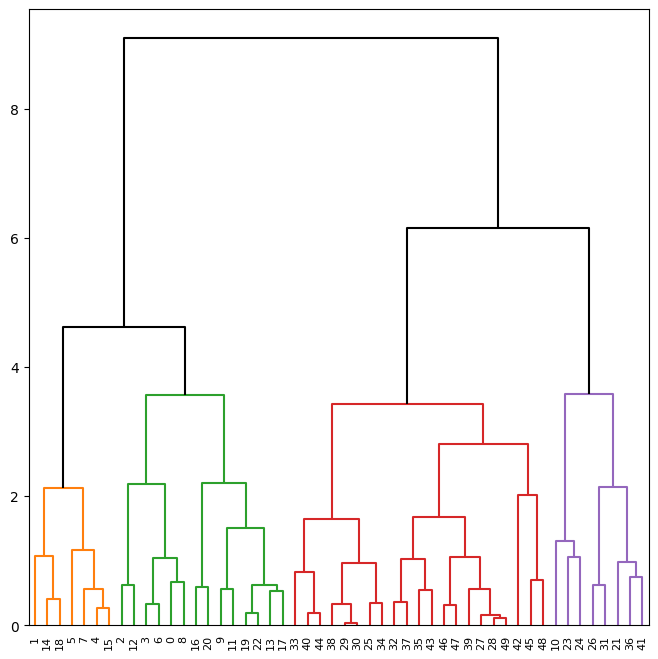

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');


To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` 
function from `scipy.cluster.hierarchy`:

In [23]:
cut_tree(linkage_comp, n_clusters=4).T


array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

In [24]:
cut_tree(linkage_comp, height=5)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

To scale the variables before performing hierarchical clustering of
the observations, we use `StandardScaler()`  as in our PCA example:

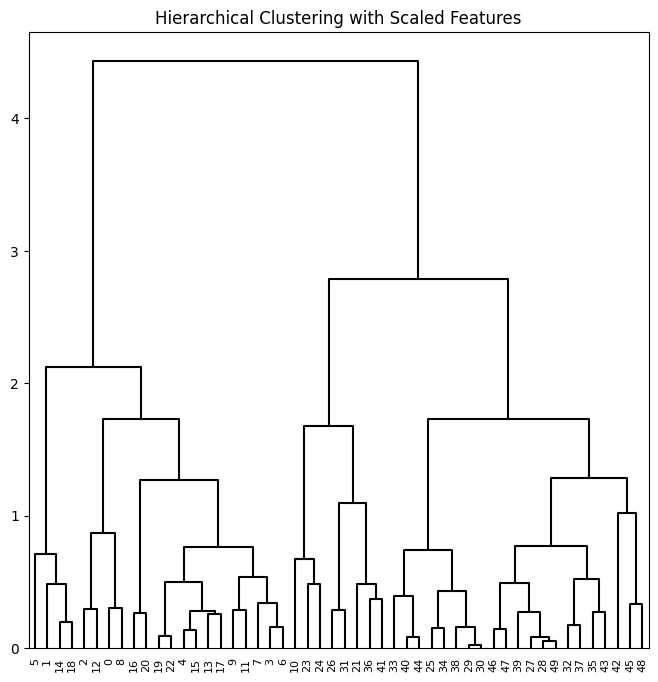

In [26]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");


Correlation-based distances between observations can be used for
clustering. The correlation between two observations measures the
similarity of their feature values. {Suppose each observation has
  $p$ features, each a single numerical value. We measure the
  similarity of two such observations by computing the
  correlation of these $p$ pairs of numbers.}
With $n$ observations, the $n\times n$ correlation matrix can then be used as a similarity (or affinity) matrix, i.e. so that one minus the correlation matrix is the dissimilarity matrix used for clustering.

Note that using correlation only makes sense for
data with at least three features since the absolute correlation
between any two observations with measurements on two features is
always one. Hence, we will cluster a three-dimensional data set.

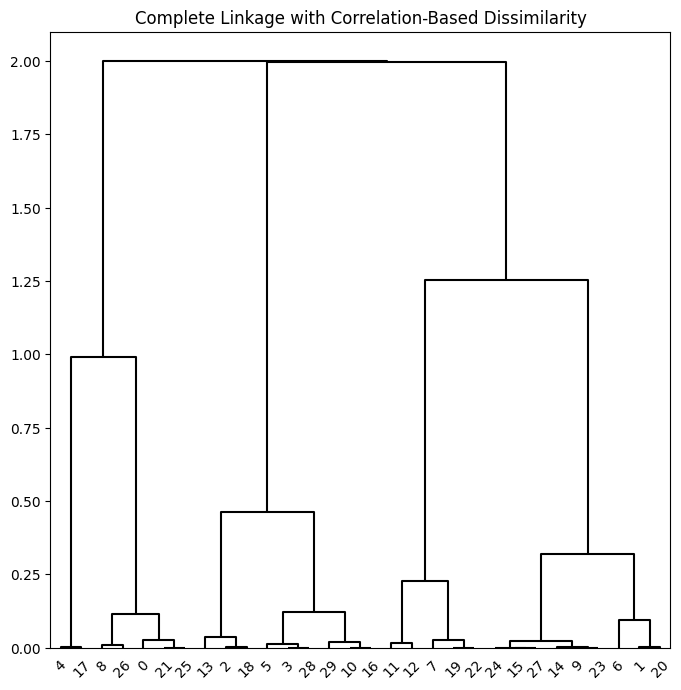

In [27]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor, ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");


## NCI60 Data Example
Unsupervised techniques are often used in the analysis of genomic
data. In particular, PCA and hierarchical clustering are popular
tools.  We illustrate these techniques on the `NCI60`  cancer cell line
microarray data, which consists of 6830 gene expression
measurements on 64 cancer cell lines.

In [28]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']


Each cell line is labeled with a cancer type. We do not make use of
the cancer types in performing PCA and clustering, as these are
unsupervised techniques. But after performing PCA and clustering, we
will check to see the extent to which these cancer types agree with
the results of these unsupervised techniques.

The data has 64 rows and 6830 columns.

In [29]:
nci_data.shape


(64, 6830)

In [33]:
nci_data

array([[ 0.3     ,  1.18    ,  0.55    , ...,  0.28    , -0.34    ,
        -1.93    ],
       [ 0.679961,  1.289961,  0.169961, ..., -0.770039, -0.390039,
        -2.000039],
       [ 0.94    , -0.04    , -0.17    , ..., -0.12    , -0.41    ,
         0.      ],
       ...,
       [ 0.21    , -0.62    , -0.15    , ...,  0.16    ,  2.03    ,
         3.94    ],
       [-0.05    ,  0.14    , -0.09    , ..., -0.49    ,  0.01    ,
        -1.72    ],
       [ 0.35    , -0.27    ,  0.02    , ...,  0.29    , -0.15    ,
         1.21    ]])

We begin by examining the cancer types for the cell lines.


In [30]:
nci_labs.value_counts()


label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

### PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes)
to have standard deviation one, although here one could reasonably argue
that it is better not to scale the genes as they are measured in the same units.

In [34]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)


We now plot the first few principal component score vectors, in order
to visualize the data. The observations (cell lines) corresponding to
a given cancer type will be plotted in the same color, so that we can
see to what extent the observations within a cancer type are similar
to each other. 

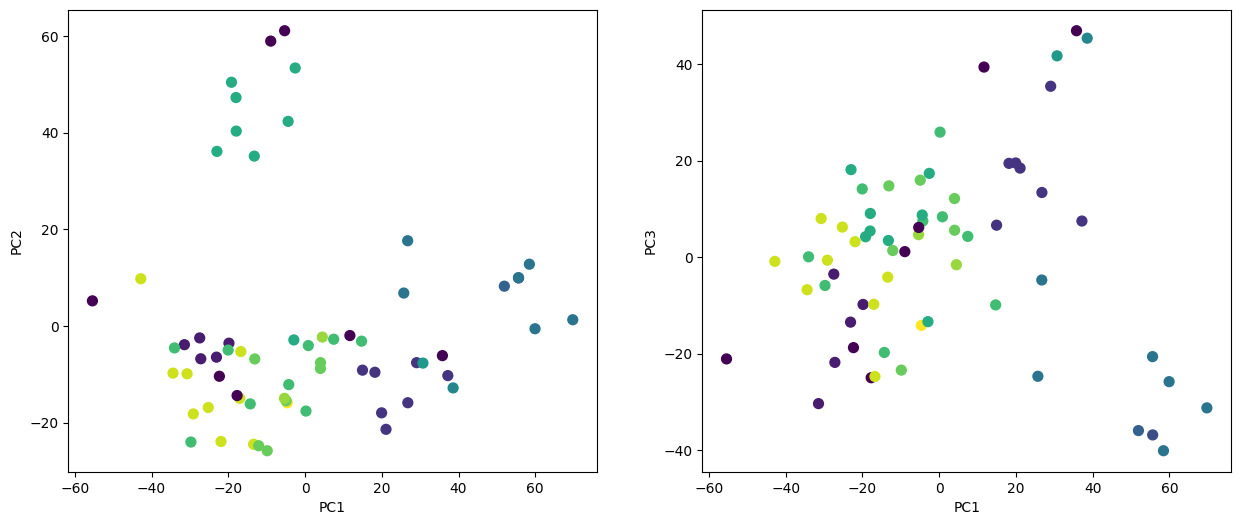

In [35]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values])
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
           nci_scores[:,1],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
           nci_scores[:,2],
           c=nci_groups,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');


On the whole, cell lines corresponding to a single cancer type do tend to
have similar values on the first few principal component score
vectors. This indicates that cell lines from the same cancer type tend
to have pretty similar gene expression levels.


    

We can also plot the percent variance
explained by the principal components as well as the cumulative percent variance explained.
This is similar to the plots we made earlier for the `USArrests` data.

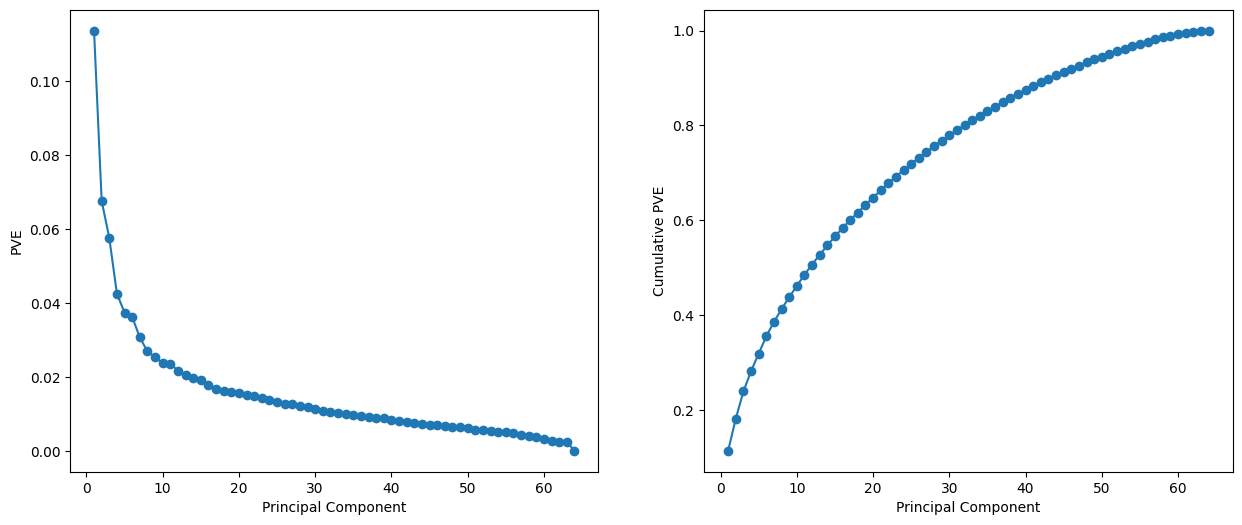

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks,
        nci_pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        nci_pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');


We see that together, the first seven principal components explain
around 40% of the variance in the data. This is not a huge amount
of the variance. However, looking at the scree plot, we see that while
each of the first seven principal components explain a substantial
amount of variance, there is a marked decrease in the variance
explained by further principal components. That is, there is an
*elbow*  in the plot after approximately the seventh
principal component.  This suggests that there may be little benefit
to examining more than seven or so principal components (though even
examining seven principal components may be difficult).

### Clustering the Observations of the NCI60 Data

We now perform hierarchical clustering of the cell lines in the `NCI60` data using
complete, single, and   average linkage. Once again, the goal is to find out whether or not the observations cluster into distinct types of cancer. Euclidean
distance is used as the dissimilarity measure. We first write a short
function to  produce
the three dendrograms.

In [37]:
def plot_nci(linkage, ax, cut=-np.inf):
    cargs = {'above_threshold_color':'black',
             'color_threshold':cut}
    hc = HClust(n_clusters=None,
                distance_threshold=0,
                linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    dendrogram(linkage_,
               ax=ax,
               labels=np.asarray(nci_labs),
               leaf_font_size=10,
               **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc


Let’s  plot our results.

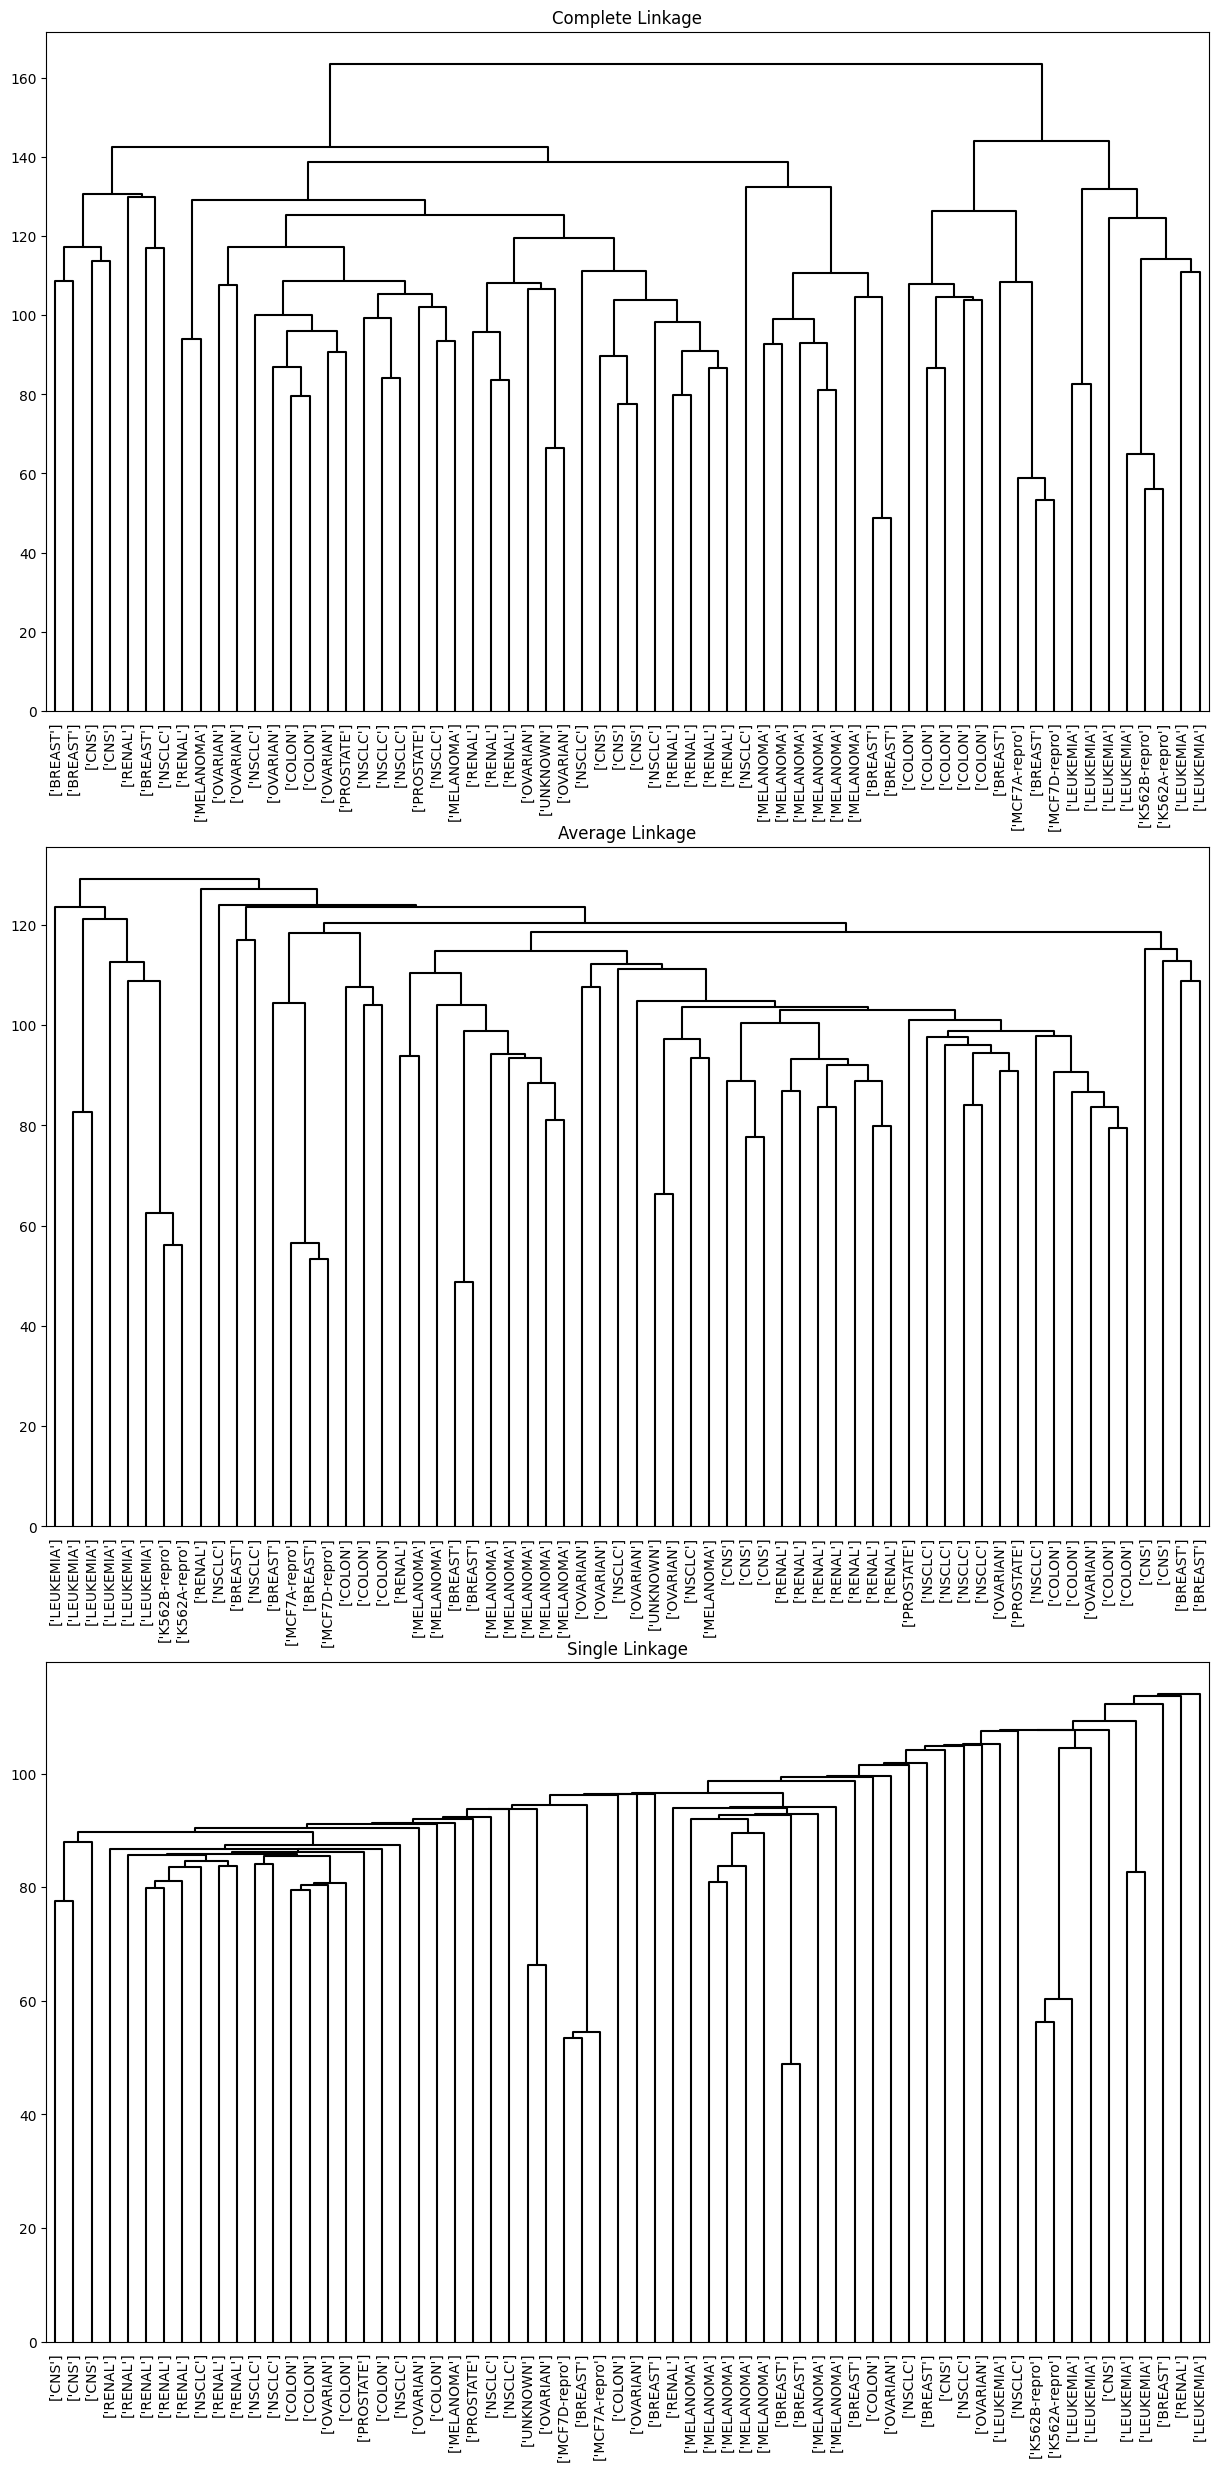

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(15,30))      
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)


We see that the
choice of linkage certainly does affect the results
obtained. Typically, single linkage will tend to yield *trailing*
clusters: very large clusters onto which individual observations
attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason,
complete and average linkage are generally preferred to single
linkage.  Clearly cell lines within a single cancer type do tend to
cluster together, although the clustering is not perfect. We will use
complete linkage hierarchical clustering for the analysis that
follows.
 
We can cut the dendrogram at the height that will yield a particular
number of clusters, say four:

In [39]:
linkage_comp = compute_linkage(hc_comp)
comp_cut = cut_tree(linkage_comp, n_clusters=4).reshape(-1)
pd.crosstab(nci_labs['label'],
            pd.Series(comp_cut.reshape(-1), name='Complete'))


Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in
one cluster, while the breast cancer cell lines are spread out over
three different clusters.

We can plot a cut on the dendrogram that produces these four clusters:

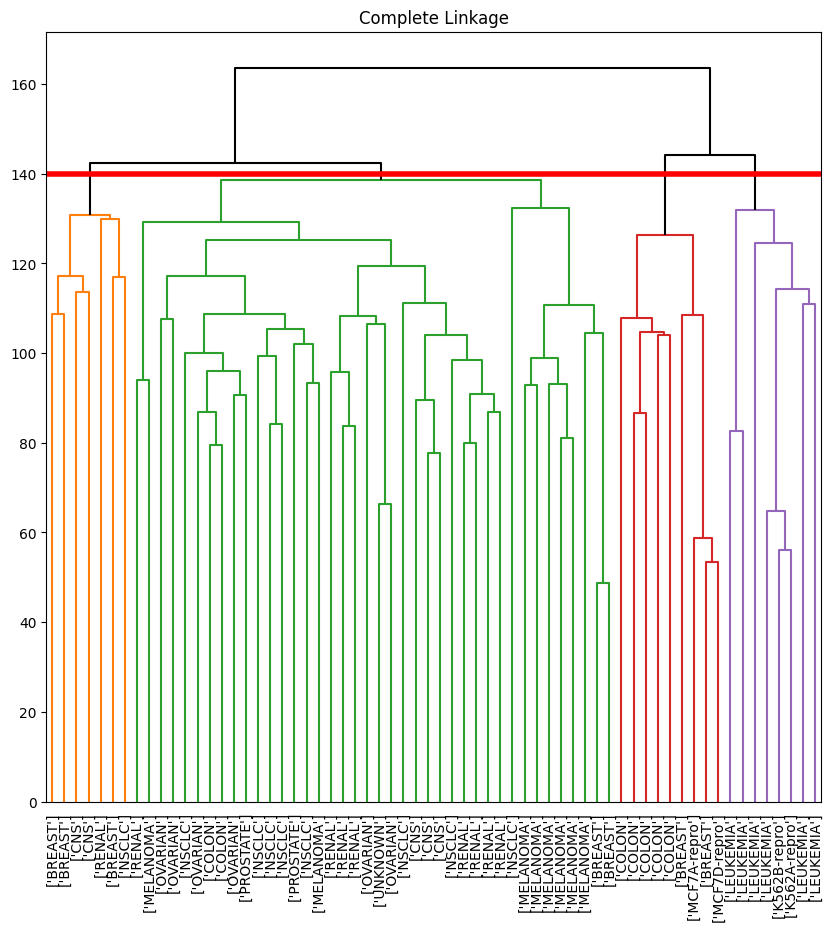

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4);


The `axhline()`  function draws a horizontal line  line on top of any
existing set of axes. The argument `140` plots a horizontal
line at height 140 on the dendrogram; this is a height that
results in four distinct clusters. It is easy to verify that the
resulting clusters are the same as the ones we obtained in
`comp_cut`.

We claimed earlier in Section 12.4.2 that
$K$-means clustering and hierarchical clustering with the dendrogram
cut to obtain the same number of clusters can yield very different
results.  How do these `NCI60` hierarchical clustering results compare
to what we get if we perform $K$-means clustering with $K=4$?

In [41]:
nci_kmeans = KMeans(n_clusters=4, 
                    random_state=0,
                    n_init=20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut, name='HClust'),
            pd.Series(nci_kmeans.labels_, name='K-means'))


K-means,0,1,2,3
HClust,,,,
0,28,3,9,0
1,7,0,0,0
2,0,0,0,8
3,0,9,0,0


We see that the four clusters obtained using hierarchical clustering
and $K$-means clustering are somewhat different. First we note
that the labels in the two clusterings are arbitrary. That is, swapping
the identifier of the cluster does not
change the clustering. We see here Cluster 3 in
$K$-means clustering is identical to cluster 2 in hierarchical
clustering. However, the other clusters differ: for instance,
cluster 0 in $K$-means clustering contains a portion of the
observations assigned to cluster 0 by hierarchical clustering, as well
as all of the observations assigned to cluster 1 by hierarchical
clustering.

Rather than performing hierarchical clustering on the entire data
matrix, we can also perform hierarchical clustering on the first few
principal component score vectors, regarding these first few components
as a less noisy version of the data.

Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


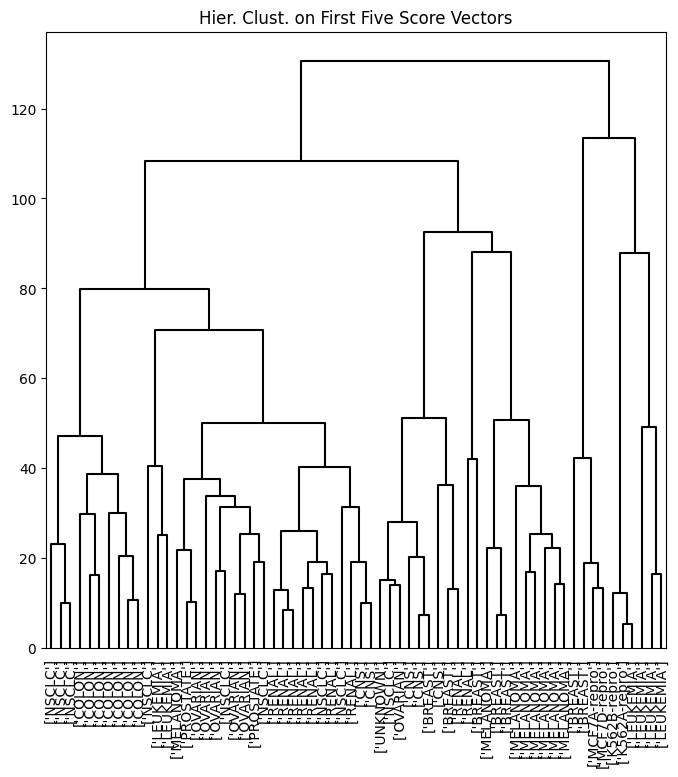

In [42]:
hc_pca = HClust(n_clusters=None,
                distance_threshold=0,
                linkage='complete'
                ).fit(nci_scores[:,:5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_pca,
           labels=np.asarray(nci_labs),
           leaf_font_size=10,
           ax=ax,
           **cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree(linkage_pca,
                                n_clusters=4).reshape(-1),
                       name='Complete-PCA')
pd.crosstab(nci_labs['label'], pca_labels)
